In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
from matplotlib.lines import Line2D
import matplotlib.patches as patches

In [2]:
# set same font value for all the figures
font_value = 22
plt.rcParams.update({'font.size': font_value})

In [3]:
# path to folder where you store GWFish_results
path_local = ''

In [4]:
lbs_errors = ['network_SNR', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 
     'theta_jn', 'psi', 'geocent_time', 'phase', 'redshift', 'err_mass_1',
        'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra', 'err_theta_jn',
            'err_psi', 'err_geocent_time', 'err_phase', 'err_sky_location']

# Figure 1

Here we compare the relative error distributions for all astrophysical models. We highlight the thresholds applied for the analysis

     optimistic
delta_dl/dl m1 z
0.01 35.75 0.12
0.01 28.9 0.12
0.0 45.3 0.12
0.01 57.81 0.44
0.01 83.15 1.08
fiducial
pessimistic


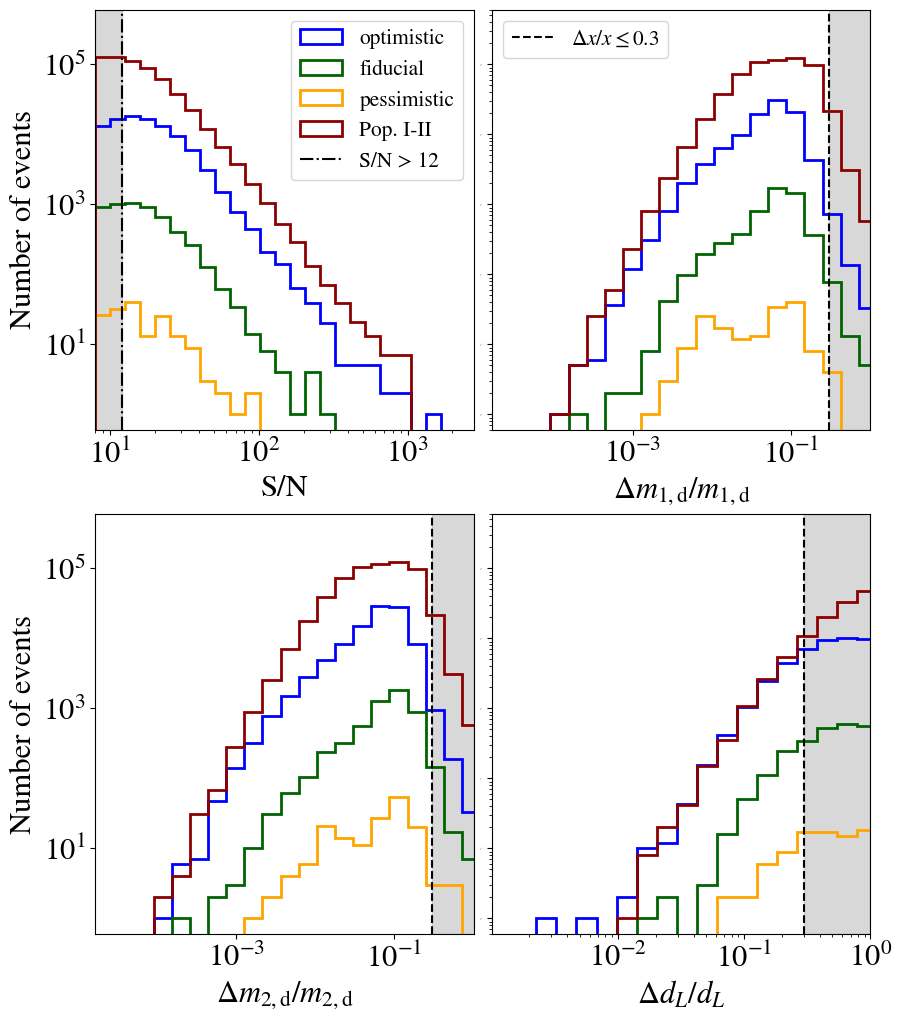

In [5]:
# figure of the paper:
# three panels: dm1/m1, dm2/m2, dDl/Dl
# for the three models + Pop. I-II

fig, axs = plt.subplots(2,2,figsize=(10,12))
fig.subplots_adjust(wspace=0.05)


parameters = ['network_SNR','mass_1', 'mass_2', 'luminosity_distance']

xlabel = ['S/N','$\Delta m_{1,\mathrm{d}}/ m_{1,\mathrm{d}}$', '$\Delta m_{2,\mathrm{d}}/ m_{2,\mathrm{d}}$',
         '$\Delta d_{L}/ d_{L}$']




colors_paper = ['darkgreen','orange','blue']

nbins = 25

bins_param = [np.logspace(np.log10(8),np.log10(2100),nbins), 
              np.logspace(-4.5,1,nbins),
              np.logspace(-4.5,1,nbins),
              np.logspace(-2.8,1,nbins)]

#font_value = 16

model = ['fiducial', 'pessimistic','optimistic']
in_folder = path_local+'GWFish_results'+'/pop3'
psd = 'ET_cryo'


for y in range(len(model)):
    
    if model[y] == 'fiducial':
        continue
        duration = '150'
        model_here_abv = 'pop3_fid'
        leg = '' #'fiducial\n$upsampled$'
        lstyle = '--'
    elif model[y] == 'pessimistic':
        continue
        duration = '5000'
        model_here_abv = 'pop3_pess'
        leg = '' #'pessimistic\n$upsampled$'
        lstyle = '--'
    elif model[y] == 'optimistic':
        duration = '10'
        model_here_abv = 'pop3_opt'
        leg = r'optimistic'
        lstyle = 'solid'


    
    for i in range(len(parameters)):
        if i == 0:
            i_x, i_y = 0, 0
        elif i == 1:
            i_x, i_y = 0, 1
        elif i == 2:
            i_x, i_y = 1, 0
        elif i == 3:
            i_x, i_y = 1, 1
        
        # GWFISH
        means_file = '%s/%s/%syr/%s/Errors_BBH_ET_%s_%syr.txt' %(str(in_folder), 
                                               str(model[y]), 
                                               str(duration),
                                               str(psd),
                                               str(model_here_abv),
                                               str(duration))
        errors = pd.read_csv(means_file,
                            names = lbs_errors, delimiter = ' ', low_memory = False, skiprows = 1)
        errors = errors.dropna()
        #print(errors.keys())

        # print salient sources
        if i == 3:
            print('    ',model[y])
            print('delta_dl/dl m1 z')
            rel_err_dl = np.array(errors['err_'+parameters[i]]/errors[parameters[i]])
            ind_L = np.nonzero(rel_err_dl < 0.015)[0]
            for i_ind_L in ind_L:
            
            
                print(np.round(rel_err_dl[i_ind_L],2),
                      np.round(np.array(errors.iloc[i_ind_L]['mass_1']),2),
                      np.round(np.array(errors.iloc[i_ind_L]['redshift']),2)
                     )

        
        if i == 0:
            #print(errors[parameters[i]])
            axs[i_x,i_y].hist(errors[parameters[i]], 
                            bins = bins_param[i], 
                            histtype = 'step', 
                            linestyle = lstyle, 
                            color = colors_paper[y],
                            label = '%s' %str(leg), lw = 2
                       )
        else:
            axs[i_x,i_y].hist(errors['err_'+parameters[i]]/errors[parameters[i]], 
                                bins = bins_param[i], 
                                histtype = 'step', 
                                linestyle = lstyle, 
                                color = colors_paper[y], lw = 2
                       )
        
            
            
            
        axs[i_x,i_y].tick_params(axis='both', which='both', labelsize=font_value)
        axs[i_x,i_y].set_xlabel(xlabel[i], fontsize = font_value)
        axs[i_x,i_y].set_yscale('log')
        axs[i_x,i_y].set_xscale('log')
        if i > 0:
            axs[i_x,i_y].set_xlim(right=1)
        #plt.title('%s' %str(psd), fontsize = font_value)
        #plt.grid(which = 'both', color = 'lightgray', alpha = 0.5, linewidth = 0.3)
        if i == 0:
            axs[i_x,i_y].set_ylabel('Number', fontsize = font_value)
        else:
            axs[i_x,i_y].set_ylabel('', fontsize = font_value)
            axs[i_x,i_y].tick_params(axis='y', which='both', labelsize=0)

        


for y in range(len(model[:2])):
    print(model[y])
    if model[y] == 'fiducial':
        duration = '10'
        model_here_abv = 'pop3_fid'
        lstyle = 'solid'
    elif model[y] == 'pessimistic':
        duration = '10'
        model_here_abv = 'pop3_pess'
        lstyle = 'solid'

    for i in range(len(parameters)):
        if i == 0:
            i_x, i_y = 0, 0
        elif i == 1:
            i_x, i_y = 0, 1
        elif i == 2:
            i_x, i_y = 1, 0
        elif i == 3:
            i_x, i_y = 1, 1
        # GWFISH
        means_file = '%s/%s/%syr/%s/Errors_BBH_ET_%s_%syr.txt' %(str(in_folder), 
                                               str(model[y]), 
                                               str(duration),
                                               str(psd),
                                               str(model_here_abv),
                                               str(duration))
        errors = pd.read_csv(means_file,
                            names = lbs_errors, delimiter = ' ', low_memory = False, skiprows = 1)
        errors = errors.dropna()
        #print(errors.keys())
        if i == 0:
            axs[i_x,i_y].hist(errors[parameters[i]], 
                            bins = bins_param[i], 
                            histtype = 'step', 
                            linestyle = 'solid', 
                            color = colors_paper[y],
                            label = str(model[y])
                              , lw = 2
                       )
        else:
            axs[i_x,i_y].hist(errors['err_'+parameters[i]]/errors[parameters[i]], 
                                bins = bins_param[i], 
                                histtype = 'step', 
                                linestyle = lstyle, 
                                color = colors_paper[y]
                             , lw = 2
                       )
        
            
            
            
        axs[i_x,i_y].tick_params(axis='both', which='both', labelsize=font_value)
        axs[i_x,i_y].set_xlabel(xlabel[i], fontsize = font_value)
        axs[i_x,i_y].set_yscale('log')
        axs[i_x,i_y].set_xscale('log')
        if i > 0:
            axs[i_x,i_y].set_xlim(right=1)
        #plt.title('%s' %str(psd), fontsize = font_value)
        #plt.grid(which = 'both', color = 'lightgray', alpha = 0.5, linewidth = 0.3)
        if i == 0:
            axs[i_x,i_y].set_ylabel('Number of events', fontsize = font_value)
        else:
            axs[i_x,i_y].set_ylabel('', fontsize = font_value)
            axs[i_x,i_y].tick_params(axis='y', which='both', labelsize=0)
                
in_folder_II = path_local+'GWFish_results'+'/pop12_10yr_v2'    
means_file_II = '%s/%s/%syr/%s/Errors_BBH_ET_%s_%syr.txt' %(str(in_folder_II), 
                                       'fiducial', 
                                       '10',
                                       str(psd),
                                       'pop12',
                                       '10')
errors = pd.read_csv(means_file_II,
                    names = lbs_errors, delimiter = ' ', low_memory = False, skiprows = 1)
errors = errors.dropna()
#print(errors.keys())
for i in range(len(parameters)):
    if i == 0:
        i_x, i_y = 0, 0
    elif i == 1:
        i_x, i_y = 0, 1
    elif i == 2:
        i_x, i_y = 1, 0
    elif i == 3:
        i_x, i_y = 1, 1

    
    if i == 0:
        
        n, bins, _ = axs[i_x,i_y].hist(errors[parameters[i]], 
                        bins = bins_param[i], 
                        histtype = 'step', 
                        linestyle = 'solid', 
                        color = 'darkred',
                        #alpha = 0.5,
                                       linewidth = 2,
                        label = 'Pop. I-II'
                   )
        
        # Shade the region
        axs[i_x,i_y].fill_between(np.linspace(8, 12),0.6, 600000, color='gray', alpha=0.3, zorder = 1)#, label='Not Used')

    
    else:
        axs[i_x,i_y].hist(errors['err_'+parameters[i]]/errors[parameters[i]], 
                            bins = bins_param[i], 
                            histtype = 'step', 
                            linestyle = 'solid', 
                          linewidth = 2,
                    #alpha = 0.5,
                            color = 'darkred'
                   )
        # Shade the region
        axs[i_x,i_y].fill_between(np.linspace(0.3, 1),0.6, 600000, color='gray', alpha=0.3, zorder = 1)#, label='Not Used')

    axs[i_x,i_y].tick_params(axis='both', which='both', labelsize=font_value)
    axs[i_x,i_y].set_xlabel(xlabel[i], fontsize = font_value)
    axs[i_x,i_y].set_yscale('log')
    axs[i_x,i_y].set_ylim([0.6,600000])
    axs[i_x,i_y].set_xscale('log')
    if i > 0:
        axs[i_x,i_y].set_xlim(right=1)
    elif i == 0:
        axs[i_x,i_y].set_xlim(left=8)

    #plt.title('%s' %str(psd), fontsize = font_value)
    #plt.grid(which = 'both', color = 'lightgray', alpha = 0.5, linewidth = 0.3)
    if i_y != 1:
        axs[i_x,i_y].set_ylabel('Number of events', fontsize = font_value)
    else:
        axs[i_x,i_y].tick_params(axis='y', which='both', labelsize=0)
    #else:
    #axs[i_x,i_y].set_ylabel('', fontsize = font_value)
    #axs[i_x,i_y].tick_params(axis='y', which='both', labelsize=0)
    # selected cuts for classification
    for i_cut in [0.3]:
        if i > 0:
            if (i == 1) and (y == 1):
                axs[i_x,i_y].axvline(x = i_cut, color = 'black', linewidth = 1.5, label = '$\Delta x/ x \leq $'+str(i_cut),
                      alpha = 1, linestyle = '--')
            else:
                axs[i_x,i_y].axvline(x = i_cut, color = 'black', linewidth = 1.5, 
                      alpha = 1,  linestyle = '--')
    else:
         if (i == 0) and (y == 1):
            axs[i_x,i_y].axvline(x = 12, color = 'black', linewidth = 1.5, label = 'S/N > 12',
                  alpha = 1, linestyle = '-.')
    
font_leg_red = font_value/1.3
axs[0,0].legend(fontsize = font_leg_red/1.1, loc = 'upper right')
axs[0,1].legend(fontsize = font_leg_red/1.1, loc = 'upper left')

#rect_1 = patches.Rectangle((0, 0), 0, 0, lw = 1.5, edgecolor='black', facecolor='none', linestyle = 'solid')
#rect_2 = patches.Rectangle((0, 0), 0, 0, lw = 1.5, edgecolor='black', facecolor='none', linestyle = '--')

#l = Line2D([0],[0],color="black", linestyle = '--')
#axs[1,0].legend([rect_1,rect_2],["original","upsampled"],fontsize = font_leg_red)

#axs[1].legend(fontsize = font_value, loc = 'upper left')
plt.savefig('Figure1_relative_errors.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()
    

# $\Delta d_{\mathrm{L}} $ VS  $ d_{\mathrm{L}} $ 
 

The following plots are useful to understand that despite applying thresholds on relative errors you are still selecting a representative sample of the population


fiducial


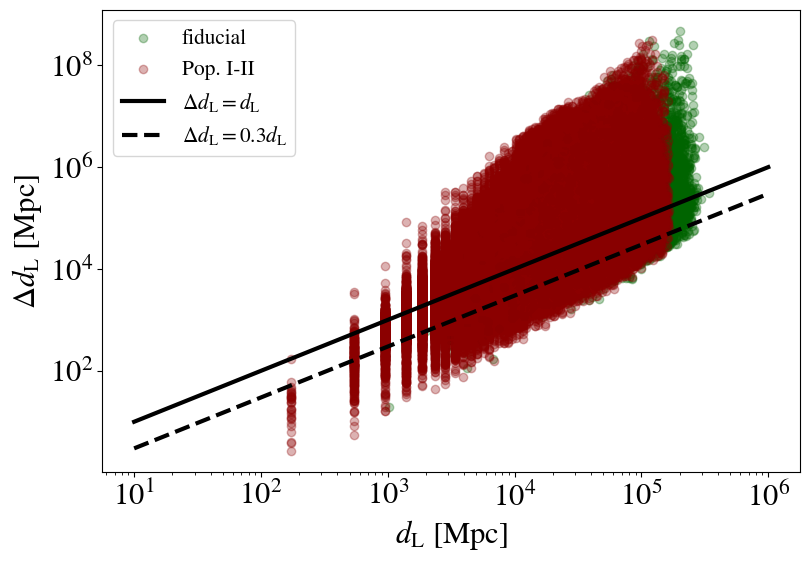

pessimistic


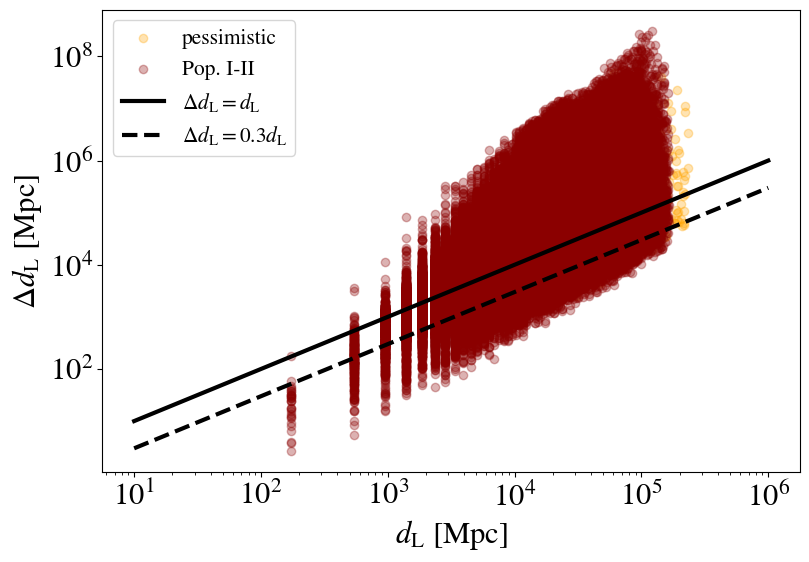

optimistic


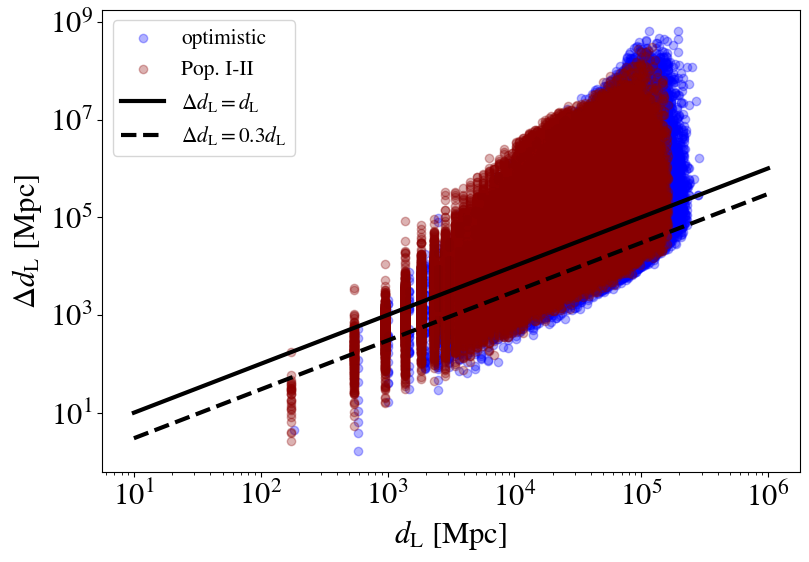

In [6]:


colors_paper = ['darkgreen','orange','blue']

model = ['fiducial', 'pessimistic','optimistic']
#in_folder = path_local+'GWFish_results_new_catalogs'+'/pop3'
in_folder = path_local+'GWFish_results'+'/pop3'
psd = 'ET_cryo'


for y in range(len(model)):

    fig, axs = plt.subplots(1,1,figsize=(9,6))
    
    print(model[y])
    if model[y] == 'fiducial':
        duration = '10'
        model_here_abv = 'pop3_fid'
        lstyle = 'solid'
    elif model[y] == 'pessimistic':
        duration = '10'
        model_here_abv = 'pop3_pess'
        lstyle = 'solid'
    elif model[y] == 'optimistic':
        duration = '10'
        model_here_abv = 'pop3_opt'
        lstyle = 'solid'


    # GWFISH
    means_file = '%s/%s/%syr/%s/Errors_BBH_ET_%s_%syr.txt' %(str(in_folder), 
                                           str(model[y]), 
                                           str(duration),
                                           str(psd),
                                           str(model_here_abv),
                                           str(duration))
    errors = pd.read_csv(means_file,
                        names = lbs_errors, delimiter = ' ', low_memory = False, skiprows = 1)
    errors = errors.dropna()

    ind_good = errors['err_'+'luminosity_distance']/errors['luminosity_distance'] < 1
    
    axs.scatter(errors['luminosity_distance'],#.loc[ind_good], 
                    errors['err_'+'luminosity_distance'],#.loc[ind_good],  
                    color = colors_paper[y],
                    label = str(model[y]), alpha = 0.3
               )
        
            
    axs.tick_params(axis='both', which='both', labelsize=font_value)
    axs.set_xlabel(r'$d_{\mathrm{L}}$ [Mpc]', fontsize = font_value)
    axs.set_yscale('log')
    axs.set_xscale('log')

    axs.set_ylabel(r'$\Delta d_{\mathrm{L}}$ [Mpc]', fontsize = font_value)
                
    #in_folder_II = path_local+'GWFish_results_new_catalogs'+'/pop12_10yr_v2'    
    in_folder_II = path_local+'GWFish_results'+'/pop12_10yr_v2'    
    means_file_II = '%s/%s/%syr/%s/Errors_BBH_ET_%s_%syr.txt' %(str(in_folder_II), 
                                           'fiducial', 
                                           '10',
                                           str(psd),
                                           'pop12',
                                           '10')
    errors = pd.read_csv(means_file_II,
                        names = lbs_errors, delimiter = ' ', low_memory = False, skiprows = 1)
    errors = errors.dropna()
    
    ind_good = errors['err_'+'luminosity_distance']/errors['luminosity_distance'] < 1
    
    axs.scatter(errors['luminosity_distance'],#.loc[ind_good],
                errors['err_'+'luminosity_distance'],#.loc[ind_good],
                                color = 'darkred', alpha = 0.3, label = 'Pop. I-II')

    arr1 = np.geomspace(1e1,1e6)
    axs.plot(arr1,arr1,label = '$\Delta d_{\mathrm{L}} = d_{\mathrm{L}}$', color = 'black', lw = 3)

    arr1 = np.geomspace(1e1,1e6)
    axs.plot(arr1,0.3*arr1,label = '$\Delta d_{\mathrm{L}} = 0.3 d_{\mathrm{L}}$', color = 'black', lw = 3,
            linestyle = '--')
        
    font_leg_red = font_value/1.3
    axs.legend(fontsize = font_leg_red/1.1, loc = 'upper right')
    axs.legend(fontsize = font_leg_red/1.1, loc = 'upper left')
    
    #plt.savefig('error_distance_redshift_'+model[y]+'.png', format = 'png', bbox_inches = 'tight', dpi = 150)
    plt.show()
    